In [101]:
import numpy as np
import pandas as pd
import Red2 
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
path =      "C:\\Users\\dorla\\Desktop\\Python\\RRNN\\data\\digit_train.csv"
test_path = "C:\\Users\\dorla\\Desktop\\Python\\RRNN\\data\\digit_test.csv"
data = pd.read_csv(path)
test_data = pd.read_csv(test_path)

columnas = data.keys().values

label_del_digito = columnas[0]
label_de_pixeles = columnas[1:]

n_datos = 28000

entrada = data.get(label_de_pixeles).values[:n_datos]
valor_int_del_digito = data.get(label_del_digito).values[:n_datos].reshape(n_datos,1)

In [103]:
valores_de_salida = []
for fila in valor_int_del_digito:
    valor = fila[0]
    match valor:
        case 0:
            valores_de_salida.append( [1,0,0,0,0,0,0,0,0,0] )
        case 1:
            valores_de_salida.append( [0,1,0,0,0,0,0,0,0,0] )
        case 2:
            valores_de_salida.append( [0,0,1,0,0,0,0,0,0,0] )
        case 3:
            valores_de_salida.append( [0,0,0,1,0,0,0,0,0,0] )
        case 4:
            valores_de_salida.append( [0,0,0,0,1,0,0,0,0,0] )
        case 5:
            valores_de_salida.append( [0,0,0,0,0,1,0,0,0,0] )
        case 6:
            valores_de_salida.append( [0,0,0,0,0,0,1,0,0,0] )
        case 7:
            valores_de_salida.append( [0,0,0,0,0,0,0,1,0,0] )
        case 8:
            valores_de_salida.append( [0,0,0,0,0,0,0,0,1,0] )
        case 9:
            valores_de_salida.append( [0,0,0,0,0,0,0,0,0,1] )

valores_de_salida = np.array(valores_de_salida)

In [104]:
iteraciones = int( 2e2 )
paso =0.05
tolerancia = 1e-11

red = Red2.Red(entrada ,valores_de_salida, [784,100,10,10], 280)

red.Entrenar(iteraciones, paso, tolerancia , print_cada=1)

Iteraciones:  0 .  Error promedio :  0.11647463891885146
Iteraciones:  1 .  Error promedio :  0.1156499044558097
Iteraciones:  2 .  Error promedio :  0.11508866718736234
Iteraciones:  3 .  Error promedio :  0.11458234222780567
Iteraciones:  4 .  Error promedio :  0.11397709462556842
Iteraciones:  5 .  Error promedio :  0.11319837575597949
Iteraciones:  6 .  Error promedio :  0.11226582905981061
Iteraciones:  7 .  Error promedio :  0.11119871170729814
Iteraciones:  8 .  Error promedio :  0.11003062582955454
Iteraciones:  9 .  Error promedio :  0.10879996289315164
Iteraciones:  10 .  Error promedio :  0.10751604644922519
Iteraciones:  11 .  Error promedio :  0.10617286169802272
Iteraciones:  12 .  Error promedio :  0.10476603468313347
Iteraciones:  13 .  Error promedio :  0.10330624761846834
Iteraciones:  14 .  Error promedio :  0.10182832854245373
Iteraciones:  15 .  Error promedio :  0.10038674046676029
Iteraciones:  16 .  Error promedio :  0.09903191251293254
Iteraciones:  17 .  Error

In [105]:
test = test_data.get(label_de_pixeles).values

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
El digito correspondiente es:  1


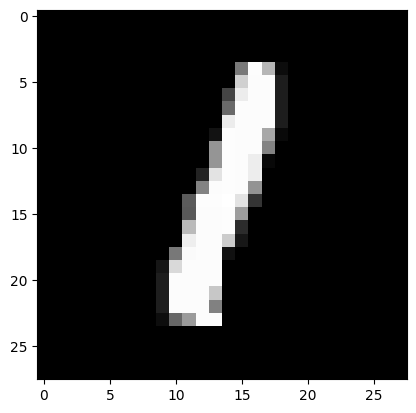

In [117]:
## Prueba individual para var que tan bien le va a ala red.
## Para elegir el digito, al final se elige el con seguridad mayor
n1 = np.random.randint(0,2800)
prueba1 = test[n1].reshape(1,784)
fig, ax = plt.subplots(1,1)
res = red.EvaluarConInput(prueba1)
res_round = np.round(res.T)
posibilidades = []
i=0
print(res_round)
for var in res_round[0]:
    if var != 0:
        posibilidades.append(i)
    
    i+=1
prueba1 = prueba1.reshape(28,28)
plt.imshow(prueba1, cmap='gray')
max_prob=0
max = -1
for j in posibilidades:
    if res[j] > max_prob:
        max_prob = res[j]
        max = j
print("El digito correspondiente es: ", max)

In [107]:
print(red.W[0])

[[ 0.46732749 -0.23693324 -0.01489298 ... -0.63247727 -0.55331384
   0.06239516]
 [-0.18349225 -0.88920331 -0.81273211 ... -0.68188078 -0.10764462
  -0.34851125]
 [ 0.78164161  0.62117194 -0.15414312 ... -0.13713336  0.0721205
   0.5244113 ]
 ...
 [-0.86072453 -0.5984276   0.5472702  ... -0.27750386 -0.64624611
  -0.38923235]
 [-0.44962469  0.34562853 -0.05088253 ...  0.31325963 -0.16675498
  -0.35729011]
 [ 0.4635709   0.05675941  0.05773477 ... -0.75122031 -0.91343407
   0.70153473]]


In [108]:
## Guardando la red entrenada  ##

# data_W = []
# data_B = []

# for i, capa in enumerate(red.W):
#     data_W.append({
#         'capa': i,
#         'pesos': capa
#     })

# for i, capa in enumerate(red.B):
#     data_B.append( {
#         'capa': i,
#         'pesos': capa
#     } )

# dfw = pd.DataFrame(data_W)
# dfb = pd.DataFrame(data_B)

# dfw.to_pickle('pesos.pkl')
# dfb.to_pickle('biases.pkl')
